In [1]:
# Install igraph
!pip install python-igraph

In [2]:
import igraph as ig

In [3]:
%run -i _functions.ipynb

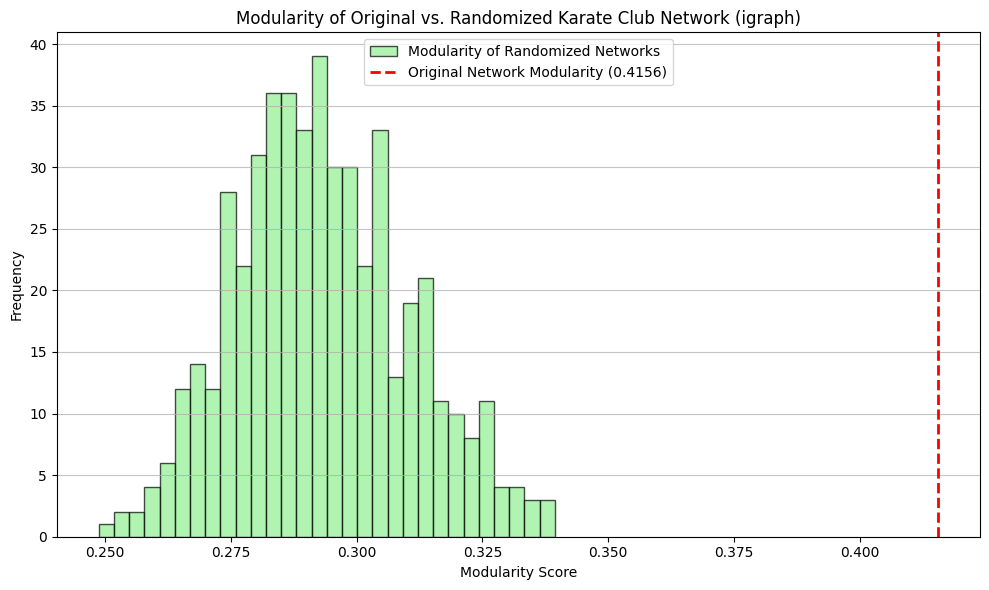

In [4]:
karate_club = ig.Graph.Famous("Zachary")

karate_club_modularity_orig = get_modularity_on_clustering(karate_club)

test_community_structure(karate_club, graph_name="Karate Club Network")

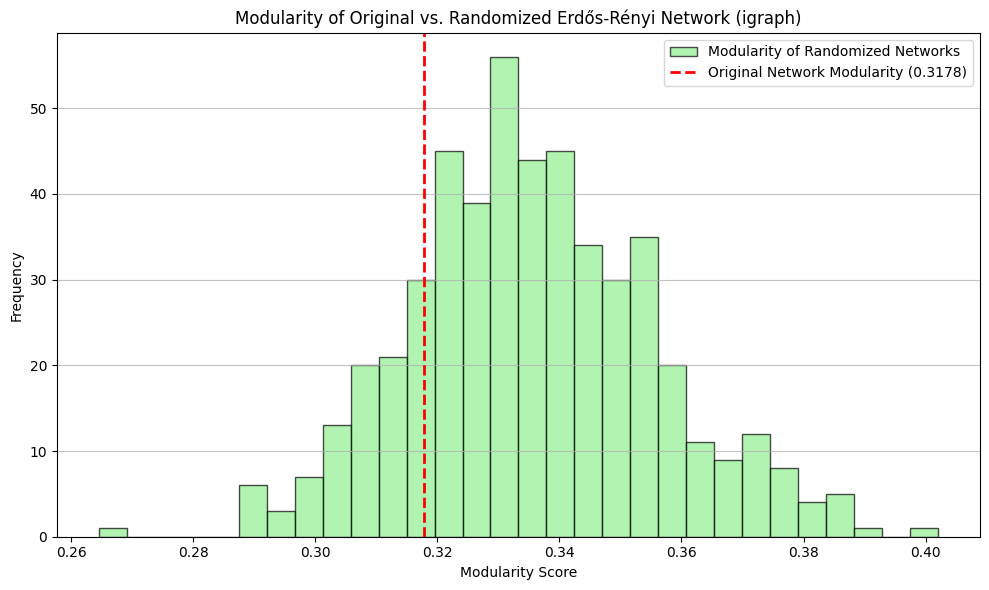

In [5]:
num_nodes = karate_club.vcount()
num_edges = karate_club.ecount()

er_graph = ig.Graph.Erdos_Renyi(n=num_nodes, m=num_edges)

er_modularity_orig = get_modularity_on_clustering(karate_club)

test_community_structure(er_graph, graph_name="Erdős-Rényi Network")

In [6]:
reference_partition_karate_club = generate_reference_partition(karate_club, 60)
reference_partition_er = generate_reference_partition(er_graph, 120)

Optimal partition found with modularity: 0.4198
Optimal partition found with modularity: 0.3561



Running Louvain community detection 500 times and calculating NMI...
  Processed 50/500 runs.
  Processed 100/500 runs.
  Processed 150/500 runs.
  Processed 200/500 runs.
  Processed 250/500 runs.
  Processed 300/500 runs.
  Processed 350/500 runs.
  Processed 400/500 runs.
  Processed 450/500 runs.
  Processed 500/500 runs.


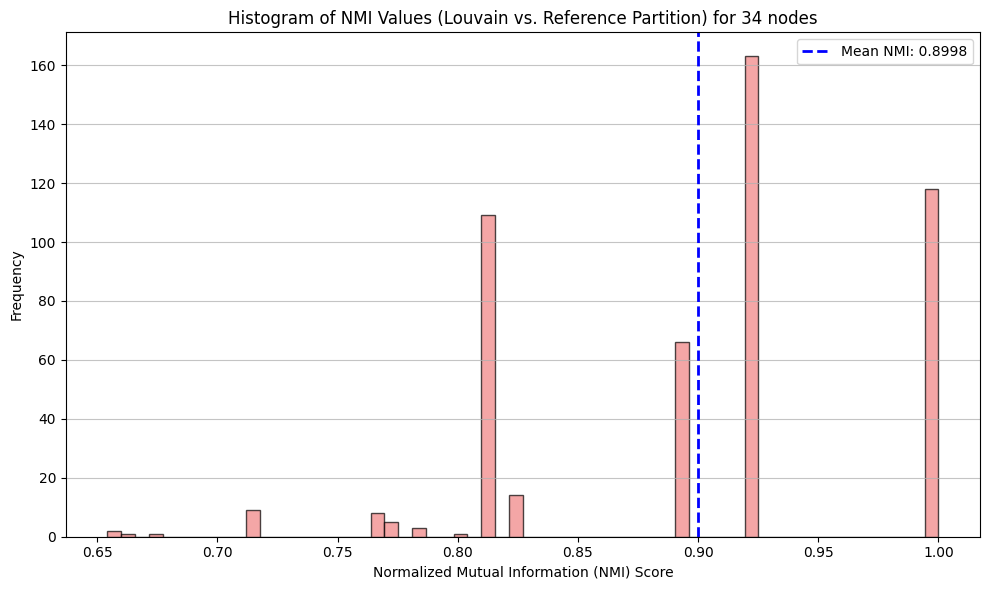

In [8]:
nmi_values = run_stochastic_community_detection(karate_club, reference_partition_karate_club, 500)

plot_nmi_histogram(karate_club, nmi_values)


Running Louvain community detection 500 times and calculating NMI...
  Processed 50/500 runs.
  Processed 100/500 runs.
  Processed 150/500 runs.
  Processed 200/500 runs.
  Processed 250/500 runs.
  Processed 300/500 runs.
  Processed 350/500 runs.
  Processed 400/500 runs.
  Processed 450/500 runs.
  Processed 500/500 runs.


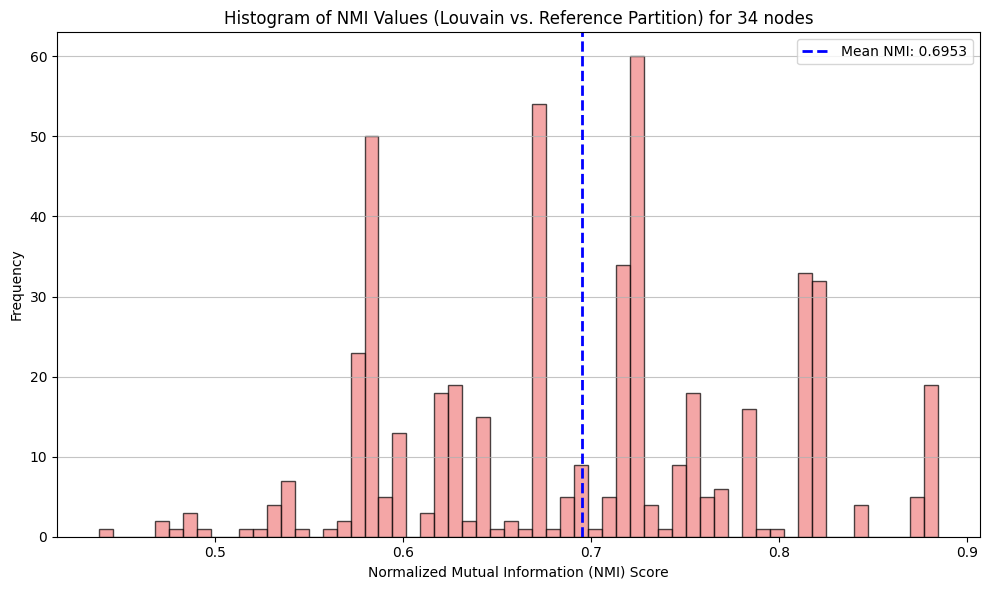

In [9]:
nmi_values = run_stochastic_community_detection(er_graph, reference_partition_er, 500)

plot_nmi_histogram(er_graph, nmi_values)


Running Louvain community detection 500 times and calculating NMI...
  Processed 50/500 runs.
  Processed 100/500 runs.
  Processed 150/500 runs.
  Processed 200/500 runs.
  Processed 250/500 runs.
  Processed 300/500 runs.
  Processed 350/500 runs.
  Processed 400/500 runs.
  Processed 450/500 runs.
  Processed 500/500 runs.


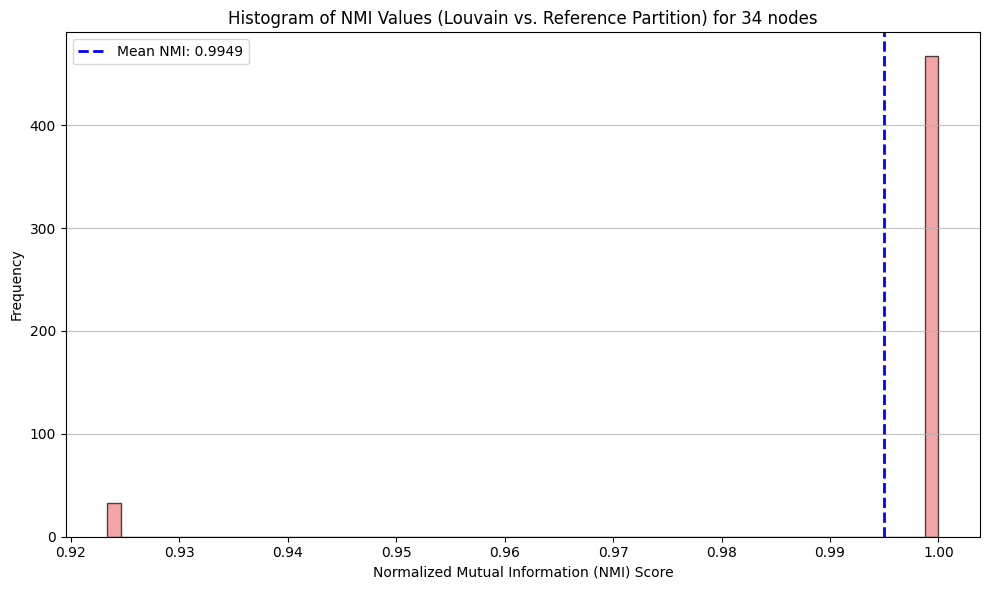

In [10]:
nmi_values = run_stochastic_community_detection(karate_club, reference_partition_karate_club, 500, community_detection_method="leiden")

plot_nmi_histogram(karate_club, nmi_values)


Running Louvain community detection 500 times and calculating NMI...
  Processed 50/500 runs.
  Processed 100/500 runs.
  Processed 150/500 runs.
  Processed 200/500 runs.
  Processed 250/500 runs.
  Processed 300/500 runs.
  Processed 350/500 runs.
  Processed 400/500 runs.
  Processed 450/500 runs.
  Processed 500/500 runs.


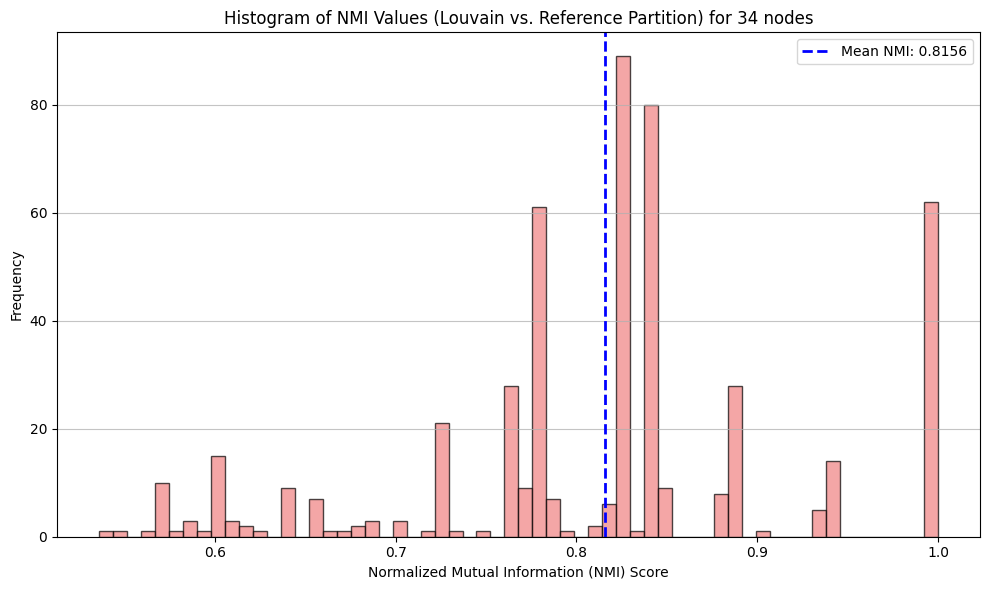

In [11]:
nmi_values = run_stochastic_community_detection(er_graph, reference_partition_er, 500, community_detection_method="leiden")

plot_nmi_histogram(er_graph, nmi_values)